# Hackerearth - Machine Learning Competition
### March, 2017
# XGBOOST

In [1]:
import pandas as pd
import numpy as np
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
from sklearn import cross_validation, metrics
from sklearn.grid_search import GridSearchCV

import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12, 4

import random

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [2]:
random.seed(1)

In [3]:
data = pd.read_csv('train_onehot.csv')

In [4]:
data.head()

,Unnamed: 0,annual_inc,collection_recovery_fee,collections_12_mths_ex_med,delinq_2yrs,dti,funded_amnt,inq_last_6mths,int_rate,loan_amnt,...,zip_0,zip_1,zip_2,zip_3,zip_4,zip_5,zip_6,zip_7,zip_8,zip_9
0,0,28700.0,0.0,0.0,0.0,33.88,14350,1.0,19.19,14350,...,0,0,0,1,0,0,0,0,0,0
1,1,65000.0,0.0,0.0,0.0,3.64,4800,1.0,10.99,4800,...,0,0,1,0,0,0,0,0,0,0
2,2,45000.0,0.0,0.0,0.0,18.42,10000,0.0,7.26,10000,...,0,0,0,0,1,0,0,0,0,0
3,3,105000.0,0.0,0.0,0.0,14.97,15000,2.0,19.72,15000,...,0,0,1,0,0,0,0,0,0,0
4,4,52000.0,0.0,0.0,0.0,20.16,16000,0.0,10.64,16000,...,0,0,0,0,0,0,0,0,0,1


In [5]:
data.drop('Unnamed: 0', axis = 1, inplace = True)

In [6]:
data.head()

,annual_inc,collection_recovery_fee,collections_12_mths_ex_med,delinq_2yrs,dti,funded_amnt,inq_last_6mths,int_rate,loan_amnt,loan_status,...,zip_0,zip_1,zip_2,zip_3,zip_4,zip_5,zip_6,zip_7,zip_8,zip_9
0,28700.0,0.0,0.0,0.0,33.88,14350,1.0,19.19,14350,0.0,...,0,0,0,1,0,0,0,0,0,0
1,65000.0,0.0,0.0,0.0,3.64,4800,1.0,10.99,4800,0.0,...,0,0,1,0,0,0,0,0,0,0
2,45000.0,0.0,0.0,0.0,18.42,10000,0.0,7.26,10000,0.0,...,0,0,0,0,1,0,0,0,0,0
3,105000.0,0.0,0.0,0.0,14.97,15000,2.0,19.72,15000,0.0,...,0,0,1,0,0,0,0,0,0,0
4,52000.0,0.0,0.0,0.0,20.16,16000,0.0,10.64,16000,0.0,...,0,0,0,0,0,0,0,0,0,1


In [7]:
test = pd.read_csv('test_onehot.csv')
test.head()

,Unnamed: 0,annual_inc,collection_recovery_fee,collections_12_mths_ex_med,delinq_2yrs,dti,funded_amnt,inq_last_6mths,int_rate,loan_amnt,...,zip_0,zip_1,zip_2,zip_3,zip_4,zip_5,zip_6,zip_7,zip_8,zip_9
0,532428,73500.0,0.0,0.0,1.0,28.65,14000,1.0,16.24,14000,...,0,0,0,0,1,0,0,0,0,0
1,532429,105000.0,0.0,0.0,0.0,31.19,16000,0.0,9.49,16000,...,0,0,1,0,0,0,0,0,0,0
2,532430,62300.0,0.0,0.0,1.0,21.73,11050,0.0,15.61,11050,...,0,0,0,0,0,0,1,0,0,0
3,532431,150000.0,0.0,0.0,0.0,17.27,35000,0.0,12.69,35000,...,0,0,0,0,0,0,0,0,0,1
4,532432,52000.0,0.0,0.0,0.0,20.19,6500,0.0,6.89,6500,...,0,0,0,0,0,0,0,1,0,0


In [8]:
test.drop('Unnamed: 0', axis = 1, inplace = True)
test.head()

,annual_inc,collection_recovery_fee,collections_12_mths_ex_med,delinq_2yrs,dti,funded_amnt,inq_last_6mths,int_rate,loan_amnt,loan_status,...,zip_0,zip_1,zip_2,zip_3,zip_4,zip_5,zip_6,zip_7,zip_8,zip_9
0,73500.0,0.0,0.0,1.0,28.65,14000,1.0,16.24,14000,NaN,...,0,0,0,0,1,0,0,0,0,0
1,105000.0,0.0,0.0,0.0,31.19,16000,0.0,9.49,16000,NaN,...,0,0,1,0,0,0,0,0,0,0
2,62300.0,0.0,0.0,1.0,21.73,11050,0.0,15.61,11050,NaN,...,0,0,0,0,0,0,1,0,0,0
3,150000.0,0.0,0.0,0.0,17.27,35000,0.0,12.69,35000,NaN,...,0,0,0,0,0,0,0,0,0,1
4,52000.0,0.0,0.0,0.0,20.19,6500,0.0,6.89,6500,NaN,...,0,0,0,0,0,0,0,1,0,0


## Split into train and validation set 

In [9]:
msk = np.random.rand(len(data)) < 0.8
train = data[msk]
valid = data[~msk]

In [10]:
test.drop('loan_status', axis = 1, inplace = True)

In [11]:
train.shape

(425543, 132)

In [12]:
valid.shape

(106885, 132)

In [13]:
test.shape

(354951, 131)

In [14]:
train.to_pickle('train.pkl')
valid.to_pickle('valid.pkl')
test.to_pickle('test.pkl')

In [15]:
target='loan_status'
IDcol = 'member_id'
train[target].value_counts()

0.0    325155
1.0    100388
Name: loan_status, dtype: int64

In [16]:
valid[target].value_counts()

0.0    81446
1.0    25439
Name: loan_status, dtype: int64

## Function for modeling and CV

The following function does the followings:
- fit the model
- calculate training accuracy
- calculate training AUC
- calculate testing AUC
- update n_estimators with cv function of xgboost package
- creates a plot of feature importance  
  
This is a slightly modified version of the function at https://github.com/aarshayj/Analytics_Vidhya/blob/master/Articles/Parameter_Tuning_XGBoost_with_Example/XGBoost%20models.ipynb

In [4]:
def modelfit(alg, dtrain, dtest, predictors, useTrainCV = True, cv_folds = 5, 
             early_stopping_rounds = 50):
    # use dtest=valid for local test
    
    if useTrainCV:
        xgb_param = alg.get_xgb_params()
        xgtrain = xgb.DMatrix(dtrain[predictors].values, label = dtrain[target].values)
        xgtest = xgb.DMatrix(dtest[predictors].values)
        cvresult = xgb.cv(xgb_param, xgtrain, num_boost_round = alg.get_params()['n_estimators'], 
                          nfold = cv_folds, metrics = {'auc'}, 
                          early_stopping_rounds = early_stopping_rounds, verbose_eval = 10)
        alg.set_params(n_estimators = cvresult.shape[0])
        print('cvresult.shape[0] = ' + str(cvresult.shape[0]))
    
    # Fit the algorithm on the data
    alg.fit(dtrain[predictors], dtrain[target],eval_metric = 'auc')
        
    # Predict training set:
    dtrain_predictions = alg.predict(dtrain[predictors])
    dtrain_predprob = alg.predict_proba(dtrain[predictors])[:,1]
        
    # Print model report:
    print("\nModel Report")
    print("Accuracy : %.4g" % metrics.accuracy_score(dtrain[target].values, dtrain_predictions))
    print("AUC Score (Train): %f" % metrics.roc_auc_score(dtrain[target], dtrain_predprob))
    
    # Predict on validation data:
    dtest['predprob'] = alg.predict_proba(dtest[predictors])[:,1]
    print('AUC Score (Test): %f' % metrics.roc_auc_score(dtest[target], dtest['predprob']))
                
    feat_imp = pd.Series(alg.booster().get_fscore()).sort_values(ascending=False)
    feat_imp.plot(kind ='bar', title = 'Feature Importances')
    plt.ylabel('Feature Importance Score')
    
    return alg

#### Determine n_estimators for learning_rate = 0.1

[0]	train-auc:0.74708+0.000750649	test-auc:0.746517+0.002114
[10]	train-auc:0.777547+0.00178823	test-auc:0.776433+0.00325521
[20]	train-auc:0.80861+0.00366781	test-auc:0.807422+0.00518306
[30]	train-auc:0.824183+0.00349023	test-auc:0.82249+0.00447139
[40]	train-auc:0.841459+0.00361995	test-auc:0.839413+0.0054478
[50]	train-auc:0.857781+0.0010767	test-auc:0.855416+0.00153907
[60]	train-auc:0.876722+0.00216293	test-auc:0.874404+0.00362681
[70]	train-auc:0.886477+0.00121534	test-auc:0.884188+0.00193745
[80]	train-auc:0.894033+0.00149915	test-auc:0.891675+0.00300731
[90]	train-auc:0.901309+0.00106606	test-auc:0.89892+0.00213969
[100]	train-auc:0.905372+0.000694882	test-auc:0.902766+0.00217495
[110]	train-auc:0.909286+0.00115587	test-auc:0.906461+0.00229308
[120]	train-auc:0.912574+0.00132226	test-auc:0.909556+0.00259136
[130]	train-auc:0.915036+0.00103997	test-auc:0.911883+0.00231319
[140]	train-auc:0.917396+0.00101917	test-auc:0.914147+0.0021612
[150]	train-auc:0.919456+0.000914925	test-a

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


AUC Score (Test): 0.946082


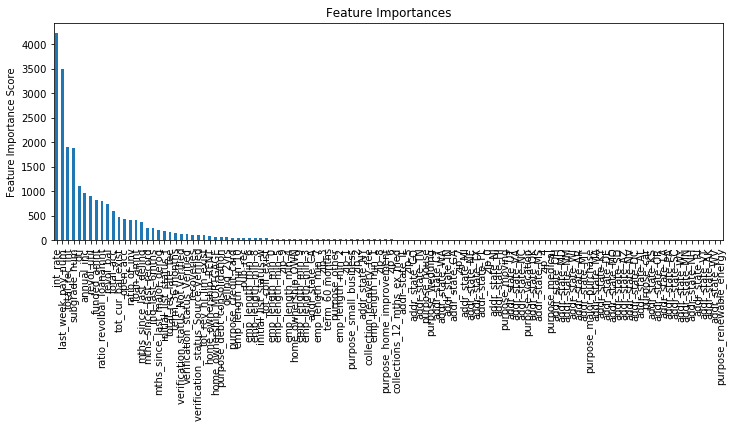

In [18]:
predictors = [x for x in train.columns if x not in [target, IDcol]]
xgb1 = XGBClassifier(learning_rate = 0.1,
                     n_estimators = 1000,
                     max_depth = 5,
                     min_child_weight = 10,
                     gamma = 0.5,
                     subsample = 0.8,
                     colsample_bytree = 0.8,
                     objective = 'binary:logistic',
                     nthread = -1,   # use all cores of the system
                     scale_pos_weight=1,
                     seed = 27)
first_alg = modelfit(xgb1, train, valid, predictors)

In [19]:
# My first prediction to submit:
test['loan_status'] = first_alg.predict_proba(test[predictors])[:,1]
test.to_csv('submit_170321_1.csv', columns = ['member_id', 'loan_status'], index = False)

### Determine n_estimators for learning_rate = 0.5

[0]	train-auc:0.74708+0.000750649	test-auc:0.746517+0.002114
[10]	train-auc:0.859737+0.00791719	test-auc:0.857622+0.00887403
[20]	train-auc:0.900065+0.0024971	test-auc:0.897247+0.0037443
[30]	train-auc:0.91575+0.00107861	test-auc:0.912393+0.00229525
[40]	train-auc:0.923434+0.000645698	test-auc:0.919437+0.0019657
[50]	train-auc:0.930032+0.00150656	test-auc:0.925457+0.00149205
[60]	train-auc:0.933961+0.000623607	test-auc:0.928821+0.00147308
[70]	train-auc:0.937378+0.000587422	test-auc:0.931704+0.00123799
[80]	train-auc:0.939453+0.000853451	test-auc:0.932996+0.00122249
[90]	train-auc:0.941697+0.000505853	test-auc:0.934898+0.00137065
[100]	train-auc:0.943262+0.000411413	test-auc:0.935585+0.00117436
[110]	train-auc:0.944941+0.000423465	test-auc:0.936644+0.00101251
[120]	train-auc:0.946225+0.000568945	test-auc:0.937178+0.000813419
[130]	train-auc:0.94742+0.000463098	test-auc:0.937727+0.000791487
[140]	train-auc:0.948393+0.000366768	test-auc:0.938041+0.000930704
[150]	train-auc:0.949359+0.000

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


AUC Score (Test): 0.942748


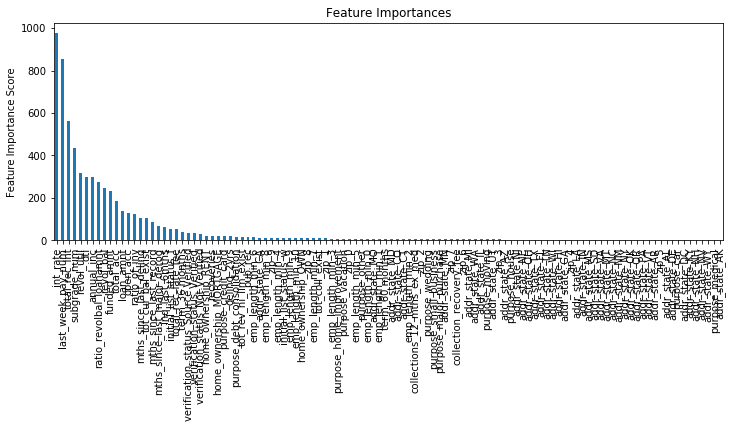

In [20]:
predictors = [x for x in train.columns if x not in [target, IDcol]]
xgb1 = XGBClassifier(learning_rate = 0.5,
                     n_estimators = 1000,
                     max_depth = 5,
                     min_child_weight = 10,
                     gamma = 0.5,
                     subsample = 0.8,
                     colsample_bytree = 0.8,
                     objective = 'binary:logistic',
                     nthread = -1,   # use all cores of the system
                     scale_pos_weight = 1,
                     seed = 27)
second_alg = modelfit(xgb1, train, valid, predictors)

In [25]:
# My second prediction to submit:
test['loan_status'] = second_alg.predict_proba(test[predictors])[:,1]
test.to_csv('submit_170321_2.csv', columns = ['member_id', 'loan_status'], index = False)

In [26]:
# Create a new submission with halves of the probabilities
test['loan_status'] = 0.5 * test['loan_status']
test.to_csv('submit_170321_2_half.csv', columns = ['member_id', 'loan_status'], index = False)

In [23]:
#Grid seach on max_depth and min_child_weight
param_test1 = {'max_depth': [3, 7, 11, 15],
               'min_child_weight': [5, 10, 15, 20]}

estimator1 = XGBClassifier(learning_rate = 0.5,
                           n_estimators = 280,
                           max_depth = 5,
                           min_child_weight = 10,
                           gamma = 0.5,
                           subsample = 0.8,
                           colsample_bytree = 0.8,
                           objective = 'binary:logistic',
                           nthread = -1,
                           scale_pos_weight = 1,
                           seed = 27)

gsearch1 = GridSearchCV(estimator = estimator1, param_grid = param_test1, scoring='roc_auc',
                        n_jobs = -1, iid = False, cv = 5)
gsearch1.fit(train[predictors],train[target])

GridSearchCV(cv=5, error_score='raise',
       estimator=XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=0.8,
       gamma=0.5, learning_rate=0.5, max_delta_step=0, max_depth=5,
       min_child_weight=10, missing=None, n_estimators=280, nthread=-1,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=27, silent=True, subsample=0.8),
       fit_params={}, iid=False, n_jobs=-1,
       param_grid={'max_depth': [3, 7, 11, 15], 'min_child_weight': [5, 10, 15, 20]},
       pre_dispatch='2*n_jobs', refit=True, scoring='roc_auc', verbose=0)

In [24]:
gsearch1.grid_scores_, gsearch1.best_params_, gsearch1.best_score_

([mean: 0.93438, std: 0.00140, params: {'max_depth': 3, 'min_child_weight': 5},
  mean: 0.93472, std: 0.00106, params: {'max_depth': 3, 'min_child_weight': 10},
  mean: 0.93484, std: 0.00096, params: {'max_depth': 3, 'min_child_weight': 15},
  mean: 0.93457, std: 0.00123, params: {'max_depth': 3, 'min_child_weight': 20},
  mean: 0.93646, std: 0.00082, params: {'max_depth': 7, 'min_child_weight': 5},
  mean: 0.93663, std: 0.00070, params: {'max_depth': 7, 'min_child_weight': 10},
  mean: 0.93728, std: 0.00055, params: {'max_depth': 7, 'min_child_weight': 15},
  mean: 0.93744, std: 0.00089, params: {'max_depth': 7, 'min_child_weight': 20},
  mean: 0.92979, std: 0.00114, params: {'max_depth': 11, 'min_child_weight': 5},
  mean: 0.92921, std: 0.00116, params: {'max_depth': 11, 'min_child_weight': 10},
  mean: 0.93003, std: 0.00096, params: {'max_depth': 11, 'min_child_weight': 15},
  mean: 0.92995, std: 0.00081, params: {'max_depth': 11, 'min_child_weight': 20},
  mean: 0.93029, std: 0.001

In [27]:
#Grid seach on max_depth and min_child_weight
param_test2a = {'max_depth':[7],
               'min_child_weight':[25, 30, 35]}

gsearch2a = GridSearchCV(estimator = estimator1, param_grid = param_test2a, scoring = 'roc_auc',
                        n_jobs = -1, iid = False, cv = 5)
gsearch2a.fit(train[predictors],train[target])

GridSearchCV(cv=5, error_score='raise',
       estimator=XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=0.8,
       gamma=0.5, learning_rate=0.5, max_delta_step=0, max_depth=5,
       min_child_weight=10, missing=None, n_estimators=280, nthread=-1,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=27, silent=True, subsample=0.8),
       fit_params={}, iid=False, n_jobs=-1,
       param_grid={'max_depth': [7], 'min_child_weight': [25, 30, 35]},
       pre_dispatch='2*n_jobs', refit=True, scoring='roc_auc', verbose=0)

In [28]:
gsearch2a.grid_scores_, gsearch2a.best_params_, gsearch2a.best_score_

([mean: 0.93773, std: 0.00147, params: {'max_depth': 7, 'min_child_weight': 25},
  mean: 0.93762, std: 0.00103, params: {'max_depth': 7, 'min_child_weight': 30},
  mean: 0.93713, std: 0.00095, params: {'max_depth': 7, 'min_child_weight': 35}],
 {'max_depth': 7, 'min_child_weight': 25},
 0.9377323586119166)

In [29]:
# Tune grid seach on max_depth and min_child_weight
param_test2b = {'max_depth':[5, 7, 9],
               'min_child_weight':[23, 27]}

gsearch2b = GridSearchCV(estimator = estimator1, param_grid = param_test2b, scoring = 'roc_auc',
                        n_jobs = -1, iid = False, cv = 5)
gsearch2b.fit(train[predictors],train[target])

GridSearchCV(cv=5, error_score='raise',
       estimator=XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=0.8,
       gamma=0.5, learning_rate=0.5, max_delta_step=0, max_depth=5,
       min_child_weight=10, missing=None, n_estimators=280, nthread=-1,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=27, silent=True, subsample=0.8),
       fit_params={}, iid=False, n_jobs=-1,
       param_grid={'max_depth': [5, 7, 9], 'min_child_weight': [23, 27]},
       pre_dispatch='2*n_jobs', refit=True, scoring='roc_auc', verbose=0)

In [30]:
gsearch2b.grid_scores_, gsearch2b.best_params_, gsearch2b.best_score_

([mean: 0.93979, std: 0.00116, params: {'max_depth': 5, 'min_child_weight': 23},
  mean: 0.93963, std: 0.00094, params: {'max_depth': 5, 'min_child_weight': 27},
  mean: 0.93795, std: 0.00078, params: {'max_depth': 7, 'min_child_weight': 23},
  mean: 0.93765, std: 0.00108, params: {'max_depth': 7, 'min_child_weight': 27},
  mean: 0.93404, std: 0.00100, params: {'max_depth': 9, 'min_child_weight': 23},
  mean: 0.93410, std: 0.00138, params: {'max_depth': 9, 'min_child_weight': 27}],
 {'max_depth': 5, 'min_child_weight': 23},
 0.9397930199097668)

In [31]:
# Tune grid seach on max_depth and min_child_weight
param_test2c = {'max_depth':[4, 5, 6],
               'min_child_weight':[21, 22, 23, 24, 25, 26]}

gsearch2c = GridSearchCV(estimator = estimator1, param_grid = param_test2c, scoring = 'roc_auc',
                        n_jobs = -1, iid = False, cv = 5)
gsearch2c.fit(train[predictors],train[target])

GridSearchCV(cv=5, error_score='raise',
       estimator=XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=0.8,
       gamma=0.5, learning_rate=0.5, max_delta_step=0, max_depth=5,
       min_child_weight=10, missing=None, n_estimators=280, nthread=-1,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=27, silent=True, subsample=0.8),
       fit_params={}, iid=False, n_jobs=-1,
       param_grid={'max_depth': [4, 5, 6], 'min_child_weight': [21, 22, 23, 24, 25, 26]},
       pre_dispatch='2*n_jobs', refit=True, scoring='roc_auc', verbose=0)

In [32]:
gsearch2c.grid_scores_, gsearch2c.best_params_, gsearch2c.best_score_

([mean: 0.93930, std: 0.00058, params: {'max_depth': 4, 'min_child_weight': 21},
  mean: 0.93965, std: 0.00070, params: {'max_depth': 4, 'min_child_weight': 22},
  mean: 0.93889, std: 0.00097, params: {'max_depth': 4, 'min_child_weight': 23},
  mean: 0.93871, std: 0.00086, params: {'max_depth': 4, 'min_child_weight': 24},
  mean: 0.93885, std: 0.00092, params: {'max_depth': 4, 'min_child_weight': 25},
  mean: 0.93903, std: 0.00112, params: {'max_depth': 4, 'min_child_weight': 26},
  mean: 0.93956, std: 0.00085, params: {'max_depth': 5, 'min_child_weight': 21},
  mean: 0.93962, std: 0.00117, params: {'max_depth': 5, 'min_child_weight': 22},
  mean: 0.93979, std: 0.00116, params: {'max_depth': 5, 'min_child_weight': 23},
  mean: 0.93966, std: 0.00060, params: {'max_depth': 5, 'min_child_weight': 24},
  mean: 0.93974, std: 0.00084, params: {'max_depth': 5, 'min_child_weight': 25},
  mean: 0.93993, std: 0.00079, params: {'max_depth': 5, 'min_child_weight': 26},
  mean: 0.93895, std: 0.0005

In [3]:
# Reboot the computer to delete variables from memory
# Rerun the first two code cells (import packages and random seed)
# Load train, valid and test
train = pd.read_pickle('train.pkl')
valid = pd.read_pickle('valid.pkl')
test = pd.read_pickle('test.pkl')
target = 'loan_status'
IDcol = 'member_id'
predictors = [x for x in train.columns if x not in [target, IDcol]]
train.shape, valid.shape, test.shape

((425543, 132), (106885, 132), (354951, 131))

In [5]:
# Grid seach on gamma
param_test3 = {'gamma':[0, 0.3, 0.6]}
estimator3 = XGBClassifier(learning_rate = 0.5,
                           n_estimators = 280,
                           max_depth = 5,               
                           min_child_weight = 26,        
                           gamma = 0.5,
                           subsample = 0.8,
                           colsample_bytree = 0.8,
                           objective = 'binary:logistic',
                           nthread = -1,
                           scale_pos_weight = 1,
                           seed = 27)
gsearch3 = GridSearchCV(estimator = estimator3, param_grid = param_test3, scoring = 'roc_auc',
                        n_jobs = -1, iid = False, cv = 5)
gsearch3.fit(train[predictors],train[target])

GridSearchCV(cv=5, error_score='raise',
       estimator=XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=0.8,
       gamma=0.5, learning_rate=0.5, max_delta_step=0, max_depth=5,
       min_child_weight=26, missing=None, n_estimators=280, nthread=-1,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=27, silent=True, subsample=0.8),
       fit_params={}, iid=False, n_jobs=-1,
       param_grid={'gamma': [0, 0.3, 0.6]}, pre_dispatch='2*n_jobs',
       refit=True, scoring='roc_auc', verbose=0)

In [6]:
gsearch3.grid_scores_, gsearch3.best_params_, gsearch3.best_score_

([mean: 0.93968, std: 0.00109, params: {'gamma': 0},
  mean: 0.93941, std: 0.00129, params: {'gamma': 0.3},
  mean: 0.93974, std: 0.00070, params: {'gamma': 0.6}],
 {'gamma': 0.6},
 0.9397400917152476)

In [4]:
# Grid seach on gamma
param_test3b = {'gamma':[0.4, 0.7]}
estimator3 = XGBClassifier(learning_rate = 0.5,
                           n_estimators = 280,
                           max_depth = 5,               
                           min_child_weight = 26,        
                           gamma = 0.5,
                           subsample = 0.8,
                           colsample_bytree = 0.8,
                           objective = 'binary:logistic',
                           nthread = -1,
                           scale_pos_weight = 1,
                           seed = 27)
gsearch3b = GridSearchCV(estimator = estimator3, param_grid = param_test3b, scoring = 'roc_auc',
                        n_jobs = -1, iid = False, cv = 5)
gsearch3b.fit(train[predictors],train[target])

GridSearchCV(cv=5, error_score='raise',
       estimator=XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=0.8,
       gamma=0.5, learning_rate=0.5, max_delta_step=0, max_depth=5,
       min_child_weight=26, missing=None, n_estimators=280, nthread=-1,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=27, silent=True, subsample=0.8),
       fit_params={}, iid=False, n_jobs=-1,
       param_grid={'gamma': [0.4, 0.7]}, pre_dispatch='2*n_jobs',
       refit=True, scoring='roc_auc', verbose=0)

In [5]:
gsearch3b.grid_scores_, gsearch3b.best_params_, gsearch3b.best_score_

([mean: 0.93944, std: 0.00117, params: {'gamma': 0.4},
  mean: 0.93951, std: 0.00082, params: {'gamma': 0.7}],
 {'gamma': 0.7},
 0.9395101068427893)

[0]	train-auc:0.747073+0.000756542	test-auc:0.746525+0.00210115
[10]	train-auc:0.861264+0.0053308	test-auc:0.859449+0.00600764
[20]	train-auc:0.901372+0.00314787	test-auc:0.899158+0.00257488
[30]	train-auc:0.914917+0.000968693	test-auc:0.911984+0.00132072
[40]	train-auc:0.923844+0.000860866	test-auc:0.920316+0.00147905
[50]	train-auc:0.929231+0.00101899	test-auc:0.925127+0.00095909
[60]	train-auc:0.933554+0.00086399	test-auc:0.929067+0.00147339
[70]	train-auc:0.936513+0.000952226	test-auc:0.93152+0.000728735
[80]	train-auc:0.93864+0.000731067	test-auc:0.933071+0.000772895
[90]	train-auc:0.940659+0.000678727	test-auc:0.934598+0.00103678
[100]	train-auc:0.942115+0.000853503	test-auc:0.935353+0.000989408
[110]	train-auc:0.943437+0.000905989	test-auc:0.936141+0.000915102
[120]	train-auc:0.944608+0.000817977	test-auc:0.936752+0.000952371
[130]	train-auc:0.945781+0.000601608	test-auc:0.937315+0.000774769
[140]	train-auc:0.946771+0.000489165	test-auc:0.937781+0.000917813
[150]	train-auc:0.947

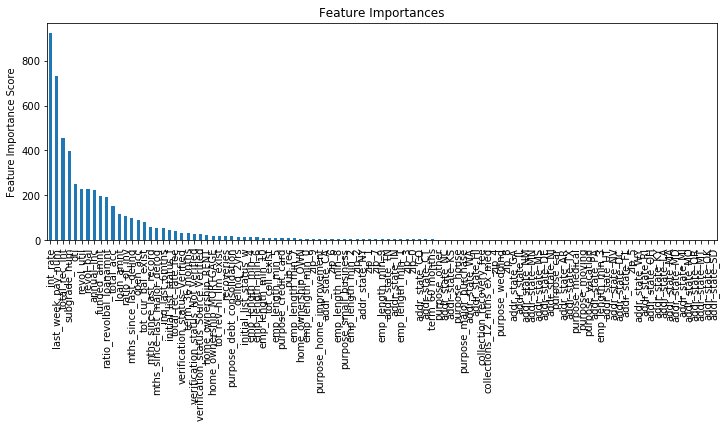

In [10]:
xgb3 = XGBClassifier(learning_rate = 0.5,
                     n_estimators = 1000,
                     max_depth = 5,             
                     min_child_weight = 26,      
                     gamma = 0.5,              
                     subsample = 0.8,
                     colsample_bytree = 0.8,
                     objective = 'binary:logistic',
                     nthread = -1,
                     scale_pos_weight = 1,
                     seed = 27)
third_alg = modelfit(xgb3, train, valid, predictors)

In [11]:
# My third prediction to submit:
test['loan_status'] = third_alg.predict_proba(test[predictors])[:,1]
test.to_csv('submit_170321_3.csv', columns = ['member_id', 'loan_status'], index = False)

In [4]:
# Grid seach on subsample and colsample_bytree
param_test4 = {'subsample':[0.6, 0.75, 0.9], 
               'colsample_bytree':[0.6, 0.75, 0.9]}
estimator4 = XGBClassifier(learning_rate = 0.5,
                           n_estimators = 252,         
                           max_depth = 5,               
                           min_child_weight = 26,       
                           gamma = 0.5,                
                           subsample = 0.8,
                           colsample_bytree = 0.8,
                           objective = 'binary:logistic',
                           nthread = -1,
                           scale_pos_weight = 1,
                           seed = 27)
gsearch4 = GridSearchCV(estimator = estimator4, param_grid = param_test4
                        , scoring = 'roc_auc',
                        n_jobs = -1, iid = False, cv = 5)
gsearch4.fit(train[predictors],train[target])

GridSearchCV(cv=5, error_score='raise',
       estimator=XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=0.8,
       gamma=0.5, learning_rate=0.5, max_delta_step=0, max_depth=5,
       min_child_weight=26, missing=None, n_estimators=252, nthread=-1,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=27, silent=True, subsample=0.8),
       fit_params={}, iid=False, n_jobs=-1,
       param_grid={'subsample': [0.6, 0.75, 0.9], 'colsample_bytree': [0.6, 0.75, 0.9]},
       pre_dispatch='2*n_jobs', refit=True, scoring='roc_auc', verbose=0)

In [5]:
gsearch4.grid_scores_, gsearch4.best_params_, gsearch4.best_score_

([mean: 0.93650, std: 0.00117, params: {'colsample_bytree': 0.6, 'subsample': 0.6},
  mean: 0.93897, std: 0.00096, params: {'colsample_bytree': 0.6, 'subsample': 0.75},
  mean: 0.94031, std: 0.00055, params: {'colsample_bytree': 0.6, 'subsample': 0.9},
  mean: 0.93657, std: 0.00100, params: {'colsample_bytree': 0.75, 'subsample': 0.6},
  mean: 0.93897, std: 0.00108, params: {'colsample_bytree': 0.75, 'subsample': 0.75},
  mean: 0.94111, std: 0.00060, params: {'colsample_bytree': 0.75, 'subsample': 0.9},
  mean: 0.93678, std: 0.00086, params: {'colsample_bytree': 0.9, 'subsample': 0.6},
  mean: 0.93869, std: 0.00140, params: {'colsample_bytree': 0.9, 'subsample': 0.75},
  mean: 0.94101, std: 0.00117, params: {'colsample_bytree': 0.9, 'subsample': 0.9}],
 {'colsample_bytree': 0.75, 'subsample': 0.9},
 0.9411081463269385)

In [5]:
# Tune grid seach on subsample and colsample_bytree
param_test5 = {'subsample':[0.9],           
               'colsample_bytree':[0.65, 0.85]}    
estimator5 = XGBClassifier(learning_rate = 0.5,
                           n_estimators = 252,          
                           max_depth = 5,               
                           min_child_weight = 26,       
                           gamma = 0.5,                
                           subsample = 0.8,
                           colsample_bytree = 0.8,
                           objective = 'binary:logistic',
                           nthread = -1,
                           scale_pos_weight = 1,
                           seed = 27)
gsearch5 = GridSearchCV(estimator = estimator5, param_grid = param_test5, scoring = 'roc_auc',
                        n_jobs = -1, iid = False, cv = 5)
gsearch5.fit(train[predictors],train[target])

GridSearchCV(cv=5, error_score='raise',
       estimator=XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=0.8,
       gamma=0.5, learning_rate=0.5, max_delta_step=0, max_depth=5,
       min_child_weight=26, missing=None, n_estimators=252, nthread=-1,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=27, silent=True, subsample=0.8),
       fit_params={}, iid=False, n_jobs=-1,
       param_grid={'subsample': [0.9], 'colsample_bytree': [0.65, 0.85]},
       pre_dispatch='2*n_jobs', refit=True, scoring='roc_auc', verbose=0)

In [6]:
gsearch5.grid_scores_, gsearch5.best_params_, gsearch5.best_score_

([mean: 0.94024, std: 0.00102, params: {'colsample_bytree': 0.65, 'subsample': 0.9},
  mean: 0.94081, std: 0.00081, params: {'colsample_bytree': 0.85, 'subsample': 0.9}],
 {'colsample_bytree': 0.85, 'subsample': 0.9},
 0.9408142497476453)

In [8]:
# Tune grid seach on subsample and colsample_bytree
param_test5a = {'subsample':[0.95],           
               'colsample_bytree':[0.65, 0.85]}    
gsearch5a = GridSearchCV(estimator = estimator5, param_grid = param_test5a, scoring = 'roc_auc',
                        n_jobs = -1, iid = False, cv = 5)
gsearch5a.fit(train[predictors],train[target])

GridSearchCV(cv=5, error_score='raise',
       estimator=XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=0.8,
       gamma=0.5, learning_rate=0.5, max_delta_step=0, max_depth=5,
       min_child_weight=26, missing=None, n_estimators=252, nthread=-1,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=27, silent=True, subsample=0.8),
       fit_params={}, iid=False, n_jobs=-1,
       param_grid={'subsample': [0.95], 'colsample_bytree': [0.65, 0.85]},
       pre_dispatch='2*n_jobs', refit=True, scoring='roc_auc', verbose=0)

In [9]:
gsearch5a.grid_scores_, gsearch5a.best_params_, gsearch5a.best_score_

([mean: 0.94126, std: 0.00052, params: {'colsample_bytree': 0.65, 'subsample': 0.95},
  mean: 0.94177, std: 0.00073, params: {'colsample_bytree': 0.85, 'subsample': 0.95}],
 {'colsample_bytree': 0.85, 'subsample': 0.95},
 0.9417681518100618)

In [ ]:
### This cell ran on other computer
# Tune grid seach on subsample and colsample_bytree
#param_test5b = {'subsample':[0.85, 0.9, 0.95],           
#               'colsample_bytree':[0.7, 0.75, 0.8]}    
#gsearch5b = GridSearchCV(estimator = estimator5, param_grid = param_test5b, scoring = 'roc_auc',
#                        n_jobs = -1, iid = False, cv = 5)
#gsearch5b.fit(train[predictors],train[target])
#gsearch5b.grid_scores_, gsearch5b.best_params_, gsearch5b.best_score_

## output:
# 

In [10]:
# Tune grid seach on subsample and colsample_bytree
param_test5c = {'subsample':[0.85],           
               'colsample_bytree':[0.65, 0.85]}    
gsearch5c = GridSearchCV(estimator = estimator5, param_grid = param_test5c, scoring = 'roc_auc',
                        n_jobs = -1, iid = False, cv = 5)
gsearch5c.fit(train[predictors],train[target])

GridSearchCV(cv=5, error_score='raise',
       estimator=XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=0.8,
       gamma=0.5, learning_rate=0.5, max_delta_step=0, max_depth=5,
       min_child_weight=26, missing=None, n_estimators=252, nthread=-1,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=27, silent=True, subsample=0.8),
       fit_params={}, iid=False, n_jobs=-1,
       param_grid={'subsample': [0.85], 'colsample_bytree': [0.65, 0.85]},
       pre_dispatch='2*n_jobs', refit=True, scoring='roc_auc', verbose=0)

In [11]:
gsearch5c.grid_scores_, gsearch5c.best_params_, gsearch5c.best_score_

([mean: 0.94039, std: 0.00058, params: {'colsample_bytree': 0.65, 'subsample': 0.85},
  mean: 0.94054, std: 0.00088, params: {'colsample_bytree': 0.85, 'subsample': 0.85}],
 {'colsample_bytree': 0.85, 'subsample': 0.85},
 0.9405423116645096)

In [12]:
# Tune grid seach on subsample and colsample_bytree
param_test5d = {'subsample':[0.95],           
               'colsample_bytree':[0.7, 0.75, 0.8]}    
gsearch5d = GridSearchCV(estimator = estimator5, param_grid = param_test5d, scoring = 'roc_auc',
                        n_jobs = -1, iid = False, cv = 5)
gsearch5d.fit(train[predictors],train[target])

GridSearchCV(cv=5, error_score='raise',
       estimator=XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=0.8,
       gamma=0.5, learning_rate=0.5, max_delta_step=0, max_depth=5,
       min_child_weight=26, missing=None, n_estimators=252, nthread=-1,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=27, silent=True, subsample=0.8),
       fit_params={}, iid=False, n_jobs=-1,
       param_grid={'subsample': [0.95], 'colsample_bytree': [0.7, 0.75, 0.8]},
       pre_dispatch='2*n_jobs', refit=True, scoring='roc_auc', verbose=0)

In [13]:
gsearch5d.grid_scores_, gsearch5d.best_params_, gsearch5d.best_score_

([mean: 0.94116, std: 0.00074, params: {'colsample_bytree': 0.7, 'subsample': 0.95},
  mean: 0.94112, std: 0.00068, params: {'colsample_bytree': 0.75, 'subsample': 0.95},
  mean: 0.94173, std: 0.00077, params: {'colsample_bytree': 0.8, 'subsample': 0.95}],
 {'colsample_bytree': 0.8, 'subsample': 0.95},
 0.9417293935494339)

In [14]:
# Tune grid seach on subsample and colsample_bytree
param_test5e = {'subsample':[0.95],           
               'colsample_bytree':[0.9, 0.95]}    
gsearch5e = GridSearchCV(estimator = estimator5, param_grid = param_test5e, scoring = 'roc_auc',
                        n_jobs = -1, iid = False, cv = 5)
gsearch5e.fit(train[predictors],train[target])

GridSearchCV(cv=5, error_score='raise',
       estimator=XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=0.8,
       gamma=0.5, learning_rate=0.5, max_delta_step=0, max_depth=5,
       min_child_weight=26, missing=None, n_estimators=252, nthread=-1,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=27, silent=True, subsample=0.8),
       fit_params={}, iid=False, n_jobs=-1,
       param_grid={'subsample': [0.95], 'colsample_bytree': [0.9, 0.95]},
       pre_dispatch='2*n_jobs', refit=True, scoring='roc_auc', verbose=0)

In [15]:
gsearch5e.grid_scores_, gsearch5e.best_params_, gsearch5e.best_score_

([mean: 0.94133, std: 0.00072, params: {'colsample_bytree': 0.9, 'subsample': 0.95},
  mean: 0.94127, std: 0.00079, params: {'colsample_bytree': 0.95, 'subsample': 0.95}],
 {'colsample_bytree': 0.9, 'subsample': 0.95},
 0.9413297025414685)

In [16]:
# Grid seach on L1 regularization parameter (reg_alpha)
param_test6 = {'reg_alpha' : [1e-5, 1e-2, 0.1, 1, 100]}
estimator6 = XGBClassifier(learning_rate = 0.5,
                           n_estimators = 252,          
                           max_depth = 5,              
                           min_child_weight = 26,      
                           gamma = 0.5,              
                           subsample = 0.95,            
                           colsample_bytree = 0.85,     
                           objective = 'binary:logistic',
                           nthread = -1,
                           scale_pos_weight = 1,
                           seed = 27)
gsearch6 = GridSearchCV(estimator = estimator6, param_grid = param_test6, scoring = 'roc_auc',
                        n_jobs = -1, iid = False, cv = 5)
gsearch6.fit(train[predictors],train[target])

GridSearchCV(cv=5, error_score='raise',
       estimator=XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=0.85,
       gamma=0.5, learning_rate=0.5, max_delta_step=0, max_depth=5,
       min_child_weight=26, missing=None, n_estimators=252, nthread=-1,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=27, silent=True, subsample=0.95),
       fit_params={}, iid=False, n_jobs=-1,
       param_grid={'reg_alpha': [1e-05, 0.01, 0.1, 1, 100]},
       pre_dispatch='2*n_jobs', refit=True, scoring='roc_auc', verbose=0)

In [17]:
gsearch6.grid_scores_, gsearch6.best_params_, gsearch6.best_score_

([mean: 0.94163, std: 0.00089, params: {'reg_alpha': 1e-05},
  mean: 0.94147, std: 0.00032, params: {'reg_alpha': 0.01},
  mean: 0.94150, std: 0.00074, params: {'reg_alpha': 0.1},
  mean: 0.94198, std: 0.00056, params: {'reg_alpha': 1},
  mean: 0.93336, std: 0.00098, params: {'reg_alpha': 100}],
 {'reg_alpha': 1},
 0.9419783890654163)

In [18]:
# Tune grid seach on L1 regularization parameter (reg_alpha)
param_test7 = {'reg_alpha' : [0.3, 3, 30]}
gsearch7 = GridSearchCV(estimator = estimator6, param_grid = param_test7, scoring = 'roc_auc',
                        n_jobs = -1, iid = False, cv = 5)
gsearch7.fit(train[predictors],train[target])

GridSearchCV(cv=5, error_score='raise',
       estimator=XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=0.85,
       gamma=0.5, learning_rate=0.5, max_delta_step=0, max_depth=5,
       min_child_weight=26, missing=None, n_estimators=252, nthread=-1,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=27, silent=True, subsample=0.95),
       fit_params={}, iid=False, n_jobs=-1,
       param_grid={'reg_alpha': [0.3, 3, 30]}, pre_dispatch='2*n_jobs',
       refit=True, scoring='roc_auc', verbose=0)

In [19]:
gsearch7.grid_scores_, gsearch7.best_params_, gsearch7.best_score_

([mean: 0.94161, std: 0.00066, params: {'reg_alpha': 0.3},
  mean: 0.94227, std: 0.00044, params: {'reg_alpha': 3},
  mean: 0.94090, std: 0.00075, params: {'reg_alpha': 30}],
 {'reg_alpha': 3},
 0.9422680859413877)

[0]	train-auc:0.747307+0.000829894	test-auc:0.746746+0.00171791
[10]	train-auc:0.85989+0.0100151	test-auc:0.857463+0.0109145
[20]	train-auc:0.900043+0.00300177	test-auc:0.897381+0.0029683
[30]	train-auc:0.914353+0.00111908	test-auc:0.911156+0.00255128
[40]	train-auc:0.92335+0.000868846	test-auc:0.919944+0.00233454
[50]	train-auc:0.928571+0.000725778	test-auc:0.924962+0.00134151
[60]	train-auc:0.932206+0.000466475	test-auc:0.928159+0.0013415
[70]	train-auc:0.935827+0.000607056	test-auc:0.931297+0.00137817
[80]	train-auc:0.938316+0.000633633	test-auc:0.933381+0.00109961
[90]	train-auc:0.94029+0.000504585	test-auc:0.935044+0.00101158
[100]	train-auc:0.942164+0.0003185	test-auc:0.936408+0.000915007
[110]	train-auc:0.94355+0.00035114	test-auc:0.937302+0.00103822
[120]	train-auc:0.944806+0.000352552	test-auc:0.938087+0.00105735
[130]	train-auc:0.94615+0.000322187	test-auc:0.938988+0.00108267
[140]	train-auc:0.947109+0.000406201	test-auc:0.939489+0.000977183
[150]	train-auc:0.948141+0.0005209

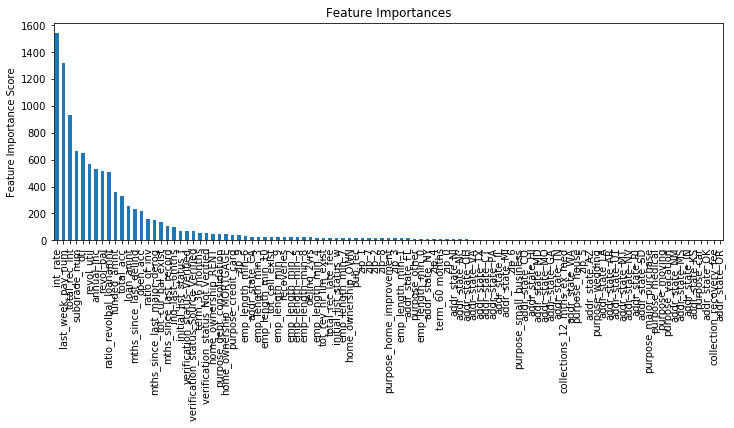

In [24]:
xgb4 = XGBClassifier(learning_rate = 0.5,
                     n_estimators = 1000,
                     max_depth = 5,           
                     min_child_weight = 26,    
                     gamma = 0.5,            
                     subsample = 0.95,         
                     colsample_bytree = 0.85,   
                     reg_alpha = 10,       
                     objective = 'binary:logistic',
                     nthread = -1,
                     scale_pos_weight = 1,
                     seed = 27)
fourth_alg = modelfit(xgb4, train, valid, predictors)

In [25]:
# My fourth prediction to submit:
test['loan_status'] = fourth_alg.predict_proba(test[predictors])[:,1]
test.to_csv('submit_170321_4.csv', columns = ['member_id', 'loan_status'], index = False)

In [28]:
# Grid seach on L2 regularization parameter (reg_lambda)
param_test8 = {'reg_lambda' : [1e-3, 0.01, 10]}
estimator8 = XGBClassifier(learning_rate = 0.5,
                           n_estimators = 440,          
                           max_depth = 5,            
                           min_child_weight = 26,    
                           gamma = 0.5,             
                           subsample = 0.95,          
                           colsample_bytree = 0.85,     
                           reg_alpha = 10,         
                           objective = 'binary:logistic',
                           nthread = -1,
                           scale_pos_weight = 1,
                           seed = 27)
gsearch8 = GridSearchCV(estimator = estimator8, param_grid = param_test8, scoring = 'roc_auc',
                        n_jobs = -1, iid = False, cv = 5)
gsearch8.fit(train[predictors],train[target])

GridSearchCV(cv=5, error_score='raise',
       estimator=XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=0.85,
       gamma=0.5, learning_rate=0.5, max_delta_step=0, max_depth=5,
       min_child_weight=26, missing=None, n_estimators=440, nthread=-1,
       objective='binary:logistic', reg_alpha=10, reg_lambda=1,
       scale_pos_weight=1, seed=27, silent=True, subsample=0.95),
       fit_params={}, iid=False, n_jobs=-1,
       param_grid={'reg_lambda': [0.001, 0.01, 10]},
       pre_dispatch='2*n_jobs', refit=True, scoring='roc_auc', verbose=0)

In [29]:
gsearch8.grid_scores_, gsearch8.best_params_, gsearch8.best_score_

([mean: 0.94272, std: 0.00065, params: {'reg_lambda': 0.001},
  mean: 0.94275, std: 0.00069, params: {'reg_lambda': 0.01},
  mean: 0.94290, std: 0.00058, params: {'reg_lambda': 10}],
 {'reg_lambda': 10},
 0.9429022106471242)

In [30]:
# Tune grid seach on L2 regularization parameter (reg_lambda)
param_test9 = {'reg_lambda' : [0, 3]}
gsearch9 = GridSearchCV(estimator = estimator8, param_grid = param_test9, scoring = 'roc_auc',
                        n_jobs = -1, iid = False, cv = 5)
gsearch9.fit(train[predictors],train[target])

GridSearchCV(cv=5, error_score='raise',
       estimator=XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=0.85,
       gamma=0.5, learning_rate=0.5, max_delta_step=0, max_depth=5,
       min_child_weight=26, missing=None, n_estimators=440, nthread=-1,
       objective='binary:logistic', reg_alpha=10, reg_lambda=1,
       scale_pos_weight=1, seed=27, silent=True, subsample=0.95),
       fit_params={}, iid=False, n_jobs=-1,
       param_grid={'reg_lambda': [0, 3]}, pre_dispatch='2*n_jobs',
       refit=True, scoring='roc_auc', verbose=0)

In [31]:
gsearch9.grid_scores_, gsearch9.best_params_, gsearch9.best_score_

([mean: 0.94272, std: 0.00065, params: {'reg_lambda': 0},
  mean: 0.94266, std: 0.00037, params: {'reg_lambda': 3}],
 {'reg_lambda': 0},
 0.9427237115635905)

In [ ]:
xgb5 = XGBClassifier(learning_rate = 0.5,
                     n_estimators = 1000,
                     max_depth = 5,            
                     min_child_weight = 26,     
                     gamma = 0.5,        
                     subsample = 0.8,          ###### change!!!!!
                     colsample_bytree = 0.8,    #### change!!!!!!
                     reg_alpha = 0.005,         ########### change!!!!!!!!
                     reg_lambda = 0.005,        #### change it!!!!!!!!!
                     objective = 'binary:logistic',
                     nthread = -1,
                     scale_pos_weight = 1,
                     seed = 27)
fifth_alg = modelfit(xgb5, train, valid, predictors)

In [ ]:
# My fifth prediction to submit:
test['loan_status'] = fifth_alg.predict_proba(test[predictors])[:,1]
test.to_csv('submit_170321_5.csv', columns = ['member_id', 'loan_status'], index = False)

## Decrease learning_rate and increase n_estimators proportionally

[0]	train-auc:0.747307+0.000829894	test-auc:0.746746+0.00171791
[10]	train-auc:0.780033+0.00398837	test-auc:0.779302+0.0050618
[20]	train-auc:0.804983+0.00527827	test-auc:0.803719+0.00655293
[30]	train-auc:0.82217+0.00659042	test-auc:0.82069+0.00787224
[40]	train-auc:0.83939+0.00469938	test-auc:0.837639+0.00554157
[50]	train-auc:0.857882+0.0044312	test-auc:0.855947+0.00444961
[60]	train-auc:0.870267+0.00564564	test-auc:0.867981+0.00645234
[70]	train-auc:0.88283+0.00366663	test-auc:0.880575+0.0048449
[80]	train-auc:0.891435+0.0032963	test-auc:0.889255+0.00466092
[90]	train-auc:0.89893+0.00200938	test-auc:0.896784+0.00311765
[100]	train-auc:0.903945+0.00102942	test-auc:0.901763+0.00178532
[110]	train-auc:0.907627+0.000692772	test-auc:0.905299+0.00185427
[120]	train-auc:0.910816+0.00100027	test-auc:0.908344+0.00192899
[130]	train-auc:0.913497+0.00106865	test-auc:0.910915+0.00230554
[140]	train-auc:0.915337+0.00116493	test-auc:0.912585+0.00216912
[150]	train-auc:0.91786+0.000890906	test-au

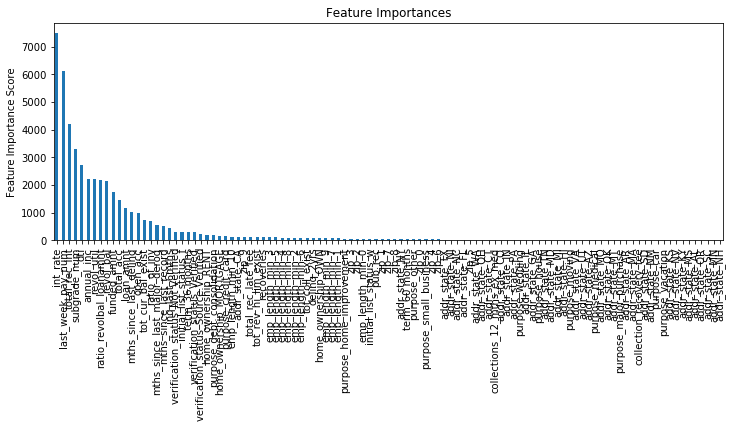

In [26]:
# without reg_lambda
xgb6 = XGBClassifier(learning_rate = 0.1,
                     n_estimators = 5000,     
                     max_depth = 5,          
                     min_child_weight = 26,      
                     gamma = 0.5,             
                     subsample = 0.95,         
                     colsample_bytree = 0.85,
                     reg_alpha = 10,         
                     objective = 'binary:logistic',
                     nthread = -1,
                     scale_pos_weight = 1,
                     seed = 27)
sixth_alg = modelfit(xgb6, train, valid, predictors)

In [27]:
# My sixth prediction to submit:
test['loan_status'] = sixth_alg.predict_proba(test[predictors])[:,1]
test.to_csv('submit_170321_6.csv', columns = ['member_id', 'loan_status'], index = False)

[0]	train-auc:0.747307+0.000829894	test-auc:0.746746+0.00171791
[10]	train-auc:0.780033+0.00398837	test-auc:0.779302+0.0050618
[20]	train-auc:0.804983+0.00527827	test-auc:0.803719+0.00655293
[30]	train-auc:0.82217+0.00659042	test-auc:0.82069+0.00787224
[40]	train-auc:0.83939+0.00469938	test-auc:0.837639+0.00554157
[50]	train-auc:0.857882+0.0044312	test-auc:0.855947+0.00444961
[60]	train-auc:0.870267+0.00564564	test-auc:0.867981+0.00645234
[70]	train-auc:0.88283+0.00366663	test-auc:0.880575+0.0048449
[80]	train-auc:0.891435+0.0032963	test-auc:0.889255+0.00466092
[90]	train-auc:0.89893+0.00200938	test-auc:0.896784+0.00311765
[100]	train-auc:0.903945+0.00102942	test-auc:0.901763+0.00178532
[110]	train-auc:0.907627+0.000692772	test-auc:0.905299+0.00185427
[120]	train-auc:0.910816+0.00100027	test-auc:0.908344+0.00192899
[130]	train-auc:0.913497+0.00106865	test-auc:0.910915+0.00230554
[140]	train-auc:0.915337+0.00116493	test-auc:0.912585+0.00216912
[150]	train-auc:0.91786+0.000890906	test-au

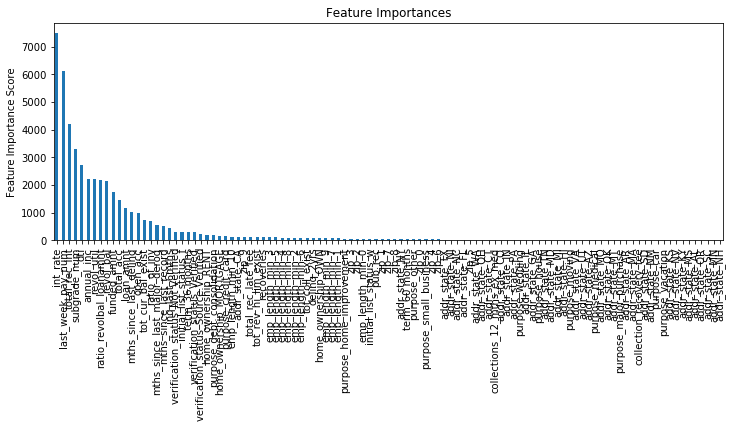

In [33]:
xgb7 = XGBClassifier(learning_rate = 0.1,
                     n_estimators = 5000,     
                     max_depth = 5,          
                     min_child_weight = 26,      
                     gamma = 0.5,             
                     subsample = 0.95,         
                     colsample_bytree = 0.85,
                     reg_alpha = 10,     
                     reg_lambda = 1,
                     objective = 'binary:logistic',
                     nthread = -1,
                     scale_pos_weight = 1,
                     seed = 27)
seventh_alg = modelfit(xgb7, train, valid, predictors)

In [34]:
# My seventh prediction to submit:
test['loan_status'] = seventh_alg.predict_proba(test[predictors])[:,1]
test.to_csv('submit_170321_7.csv', columns = ['member_id', 'loan_status'], index = False)

[0]	train-auc:0.74696+0.000526165	test-auc:0.746352+0.00171599
[10]	train-auc:0.869169+0.0029659	test-auc:0.86725+0.00338514
[20]	train-auc:0.902978+0.00138632	test-auc:0.900235+0.00244573
[30]	train-auc:0.914699+0.00142157	test-auc:0.911484+0.003196
[40]	train-auc:0.922171+0.00140784	test-auc:0.91841+0.00285509
[50]	train-auc:0.926816+0.00111065	test-auc:0.922987+0.00204497
[60]	train-auc:0.929784+0.000834124	test-auc:0.925547+0.00199745
[70]	train-auc:0.932577+0.000929526	test-auc:0.927884+0.00150246
[80]	train-auc:0.934383+0.000927459	test-auc:0.929384+0.00199262
[90]	train-auc:0.936335+0.000873221	test-auc:0.931155+0.00193388
[100]	train-auc:0.937994+0.000853858	test-auc:0.9327+0.00163594
[110]	train-auc:0.93926+0.000749353	test-auc:0.933631+0.00131489
[120]	train-auc:0.940243+0.000686935	test-auc:0.93435+0.00136553
[130]	train-auc:0.94122+0.000538008	test-auc:0.935129+0.00147515
[140]	train-auc:0.941929+0.000591778	test-auc:0.935661+0.00143851
[150]	train-auc:0.942729+0.000508313	

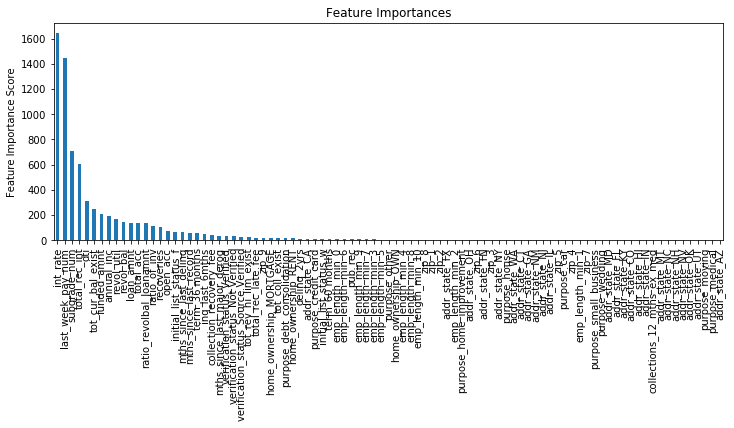

In [35]:
xgb8 = XGBClassifier(learning_rate = 0.5,
                     n_estimators = 1000,     
                     max_depth = 5,          
                     min_child_weight = 26,      
                     gamma = 0.5,             
                     subsample = 0.95,         
                     colsample_bytree = 0.85,
                     reg_alpha = 10,     
                     reg_lambda = 1,
                     objective = 'reg:linear',
                     nthread = -1,
                     scale_pos_weight = 1,
                     seed = 27)
eighth_alg = modelfit(xgb8, train, valid, predictors)

In [36]:
# My eighth prediction to submit:
test['loan_status'] = eighth_alg.predict_proba(test[predictors])[:,1]
test.to_csv('submit_170321_8.csv', columns = ['member_id', 'loan_status'], index = False)

## My last try: train the first model on the whole dataset

In [4]:
def modelfit_modified(alg, dtrain, predictors, useTrainCV = True, cv_folds = 5, 
             early_stopping_rounds = 50):
    # use dtest=valid for local test
    
    if useTrainCV:
        xgb_param = alg.get_xgb_params()
        xgtrain = xgb.DMatrix(dtrain[predictors].values, label = dtrain[target].values)
        cvresult = xgb.cv(xgb_param, xgtrain, num_boost_round = alg.get_params()['n_estimators'], 
                          nfold = cv_folds, metrics = {'auc'}, 
                          early_stopping_rounds = early_stopping_rounds, verbose_eval = 10)
        alg.set_params(n_estimators = cvresult.shape[0])
        print('cvresult.shape[0] = ' + str(cvresult.shape[0]))
    
    # Fit the algorithm on the data
    alg.fit(dtrain[predictors], dtrain[target],eval_metric = 'auc')
        
    # Predict training set:
    dtrain_predictions = alg.predict(dtrain[predictors])
    dtrain_predprob = alg.predict_proba(dtrain[predictors])[:,1]
        
    # Print model report:
    print("\nModel Report")
    print("Accuracy : %.4g" % metrics.accuracy_score(dtrain[target].values, dtrain_predictions))
    print("AUC Score (Train): %f" % metrics.roc_auc_score(dtrain[target], dtrain_predprob))
                     
    feat_imp = pd.Series(alg.booster().get_fscore()).sort_values(ascending=False)
    feat_imp.plot(kind ='bar', title = 'Feature Importances')
    plt.ylabel('Feature Importance Score')
    
    return alg

In [5]:
all_data = train.append(valid, ignore_index=True)

In [6]:
all_data.shape

(532428, 132)

In [7]:
all_data.head()

,annual_inc,collection_recovery_fee,collections_12_mths_ex_med,delinq_2yrs,dti,funded_amnt,inq_last_6mths,int_rate,loan_amnt,loan_status,...,zip_0,zip_1,zip_2,zip_3,zip_4,zip_5,zip_6,zip_7,zip_8,zip_9
0,28700.0,0.0,0.0,0.0,33.88,14350,1.0,19.19,14350,0.0,...,0,0,0,1,0,0,0,0,0,0
1,65000.0,0.0,0.0,0.0,3.64,4800,1.0,10.99,4800,0.0,...,0,0,1,0,0,0,0,0,0,0
2,45000.0,0.0,0.0,0.0,18.42,10000,0.0,7.26,10000,0.0,...,0,0,0,0,1,0,0,0,0,0
3,52000.0,0.0,0.0,0.0,20.16,16000,0.0,10.64,16000,0.0,...,0,0,0,0,0,0,0,0,0,1
4,120000.0,0.0,0.0,0.0,12.30,15000,0.0,8.90,15000,0.0,...,0,0,0,0,1,0,0,0,0,0


In [ ]:
xgb_last = XGBClassifier(learning_rate = 0.02,
                     n_estimators = 20000,
                     max_depth = 5,
                     min_child_weight = 10,
                     gamma = 0.5,
                     subsample = 0.8,
                     colsample_bytree = 0.8,
                     objective = 'binary:logistic',
                     nthread = -1,   # use all cores of the system
                     scale_pos_weight=1,
                     seed = 27)
last_alg = modelfit_modified(xgb_last, all_data, predictors, useTrainCV = True)

[0]	train-auc:0.7493+0.000313529	test-auc:0.74872+0.00206043
[10]	train-auc:0.764183+0.00578478	test-auc:0.764171+0.00457491
[20]	train-auc:0.766565+0.00416246	test-auc:0.766306+0.00268089
[30]	train-auc:0.768888+0.00258331	test-auc:0.768602+0.0018871
[40]	train-auc:0.771772+0.00268656	test-auc:0.77128+0.00122237
[50]	train-auc:0.776616+0.00171179	test-auc:0.775978+0.00225695
[60]	train-auc:0.783409+0.00244425	test-auc:0.782772+0.0034454
[70]	train-auc:0.79134+0.00201918	test-auc:0.790576+0.00330316
[80]	train-auc:0.801179+0.00221305	test-auc:0.800332+0.00352739
[90]	train-auc:0.807774+0.00236913	test-auc:0.806862+0.00326433
[100]	train-auc:0.811868+0.00201391	test-auc:0.810858+0.00267427
[110]	train-auc:0.813683+0.00125483	test-auc:0.812645+0.00222016
[120]	train-auc:0.815527+0.00169488	test-auc:0.814477+0.00287879
[130]	train-auc:0.818563+0.00184886	test-auc:0.817516+0.00322074
[140]	train-auc:0.821784+0.00180009	test-auc:0.820679+0.00308963
[150]	train-auc:0.823994+0.00203568	test-a


Model Report
Accuracy : 0.9331
AUC Score (Train): 0.969583


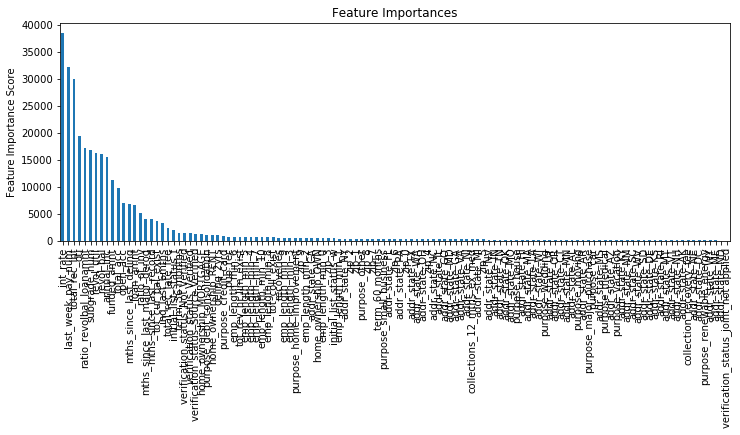

In [8]:
xgb_last1 = XGBClassifier(learning_rate = 0.02,
                     n_estimators = 13700,
                     max_depth = 5,
                     min_child_weight = 10,
                     gamma = 0.5,
                     subsample = 0.8,
                     colsample_bytree = 0.8,
                     objective = 'binary:logistic',
                     nthread = -1,   # use all cores of the system
                     scale_pos_weight=1,
                     seed = 27)
last_alg = modelfit_modified(xgb_last1, all_data, predictors, useTrainCV = False)

In [9]:
# My eighth prediction to submit:
test['loan_status'] = last_alg.predict_proba(test[predictors])[:,1]
test.to_csv('submit_170321_last.csv', columns = ['member_id', 'loan_status'], index = False)